# RUL Long Live 設備健康檢測作業說明

本 Notebook 主要針對設備剩餘壽命（RUL, Remaining Useful Life）進行 long live 測試與分析。內容包含感測數據的讀取、視覺化，以及針對特定設備的數據趨勢觀察，為後續預測與健康管理提供基礎。

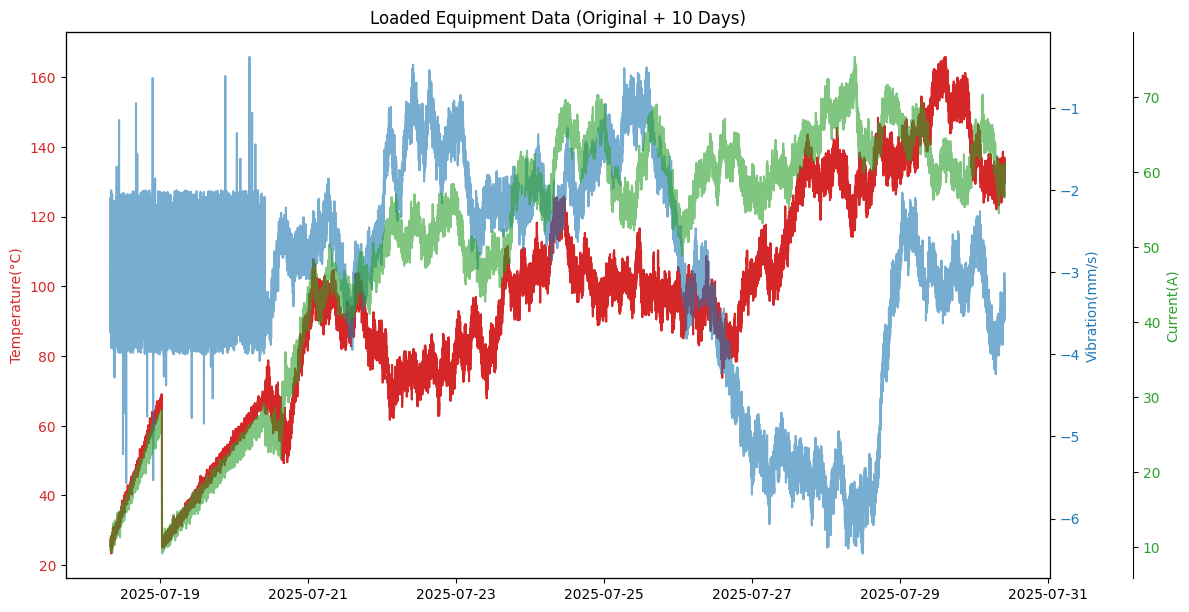

In [3]:
# 匯入必要套件
import pandas as pd  # 資料處理
import numpy as np   # 數值運算
from datetime import datetime, timedelta  # 處理時間
import random
import matplotlib.pyplot as plt
# 讀取完整數據
df_loaded = pd.read_csv('equipment_data_with_11days.csv', parse_dates=['Time'])

# 繪製三感測數據折線圖
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_loaded['Time'], df_loaded['Temperature(°C)'], label='Temperature(°C)', color='tab:red')
ax1.set_ylabel('Temperature(°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_loaded['Time'], df_loaded['Vibration(mm/s)'], label='Vibration(mm/s)', color='tab:blue', alpha=0.6)
ax2.set_ylabel('Vibration(mm/s)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df_loaded['Time'], df_loaded['Current(A)'], label='Current(A)', color='tab:green', alpha=0.6)
ax3.set_ylabel('Current(A)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Loaded Equipment Data (Original + 10 Days)')
plt.show()

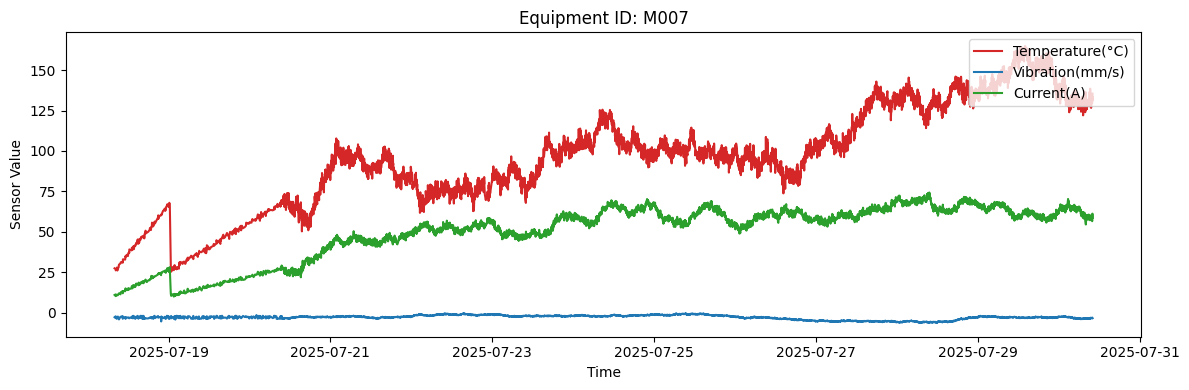

In [4]:
# 只繪製設備編號為 M007 的三感測數據折線圖
sub_df = df_loaded[df_loaded['Equipment_ID'] == 'M007']
plt.figure(figsize=(12, 4))
plt.plot(sub_df['Time'], sub_df['Temperature(°C)'], label='Temperature(°C)', color='tab:red')
plt.plot(sub_df['Time'], sub_df['Vibration(mm/s)'], label='Vibration(mm/s)', color='tab:blue')
plt.plot(sub_df['Time'], sub_df['Current(A)'], label='Current(A)', color='tab:green')
plt.title('Equipment ID: M007')
plt.ylabel('Sensor Value')
plt.xlabel('Time')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


作業題目：
1. 將sub_df資料7/19~7/22變成訓練集，並預測之後的溫度趨勢
2. 新增利用lstm 學習震動與電流數據來預測溫度
3. 結果評估
4. 利用與原數據的差異性，實作RUL結果分析，顯示設備剩餘壽命 